# Data query - Chemistry and PatCID

PatCID is a collection of molecular structures to speed up discovery of new molecules, automatically and at scale with Deep Search.
This large-scale collection was created by processing molecular images in United States, European, Japanese, Korean, and Chinese patents.
In this 
We have applied a graph-based visual recognition model to obtain high-precision conversion of these molecular images (MolGrapher, ICCV2023, accepted). Contact us for early access.

In this example we will demonstrate how to interact with Deep Search for
- Querying molecules by similarity or substructure
- Given a list of patents, show the molecules that are mentioned
- Given a list of molecules, list the patents mentioning them


### Access required

The content of this notebook requires access to Deep Search capabilities which are not
available on the public access system.

[Contact us](https://ds4sd.github.io/) if you are interested in exploring
the enterprise-level Deep Search capabilities.

### Set notebook parameters

In [17]:
from dsnotebooks.settings import NotebookSettings

# notebooks settings auto-loaded from .env / env vars
notebook_settings = NotebookSettings()

PROFILE_NAME = notebook_settings.profile  # the profile to use

---

### Import example dependencies

In [18]:
# Import standard dependenices
import pandas as pd
import mols2grid
from rdkit import Chem
import json

# IPython utilities
from IPython.display import display, Markdown, HTML, display_html

# Import the deepsearch-toolkit
import deepsearch as ds
from deepsearch.cps.client.api import CpsApi
from deepsearch.cps.client.components.elastic import ElasticDataCollectionSource
from deepsearch.chemistry.queries import (
    query_chemistry,
    CompoundsBySubstructure,
    CompoundsBySimilarity,
    CompoundsBySmarts,
    CompoundsIn,
    DocumentsByIds,
    DocumentsHaving
)
from deepsearch.chemistry.queries import (
    query_chemistry,
    CompoundsBySubstructure,
    CompoundsBySimilarity,
    CompoundsBySmarts,
    CompoundsIn,
    DocumentsByIds,
    DocumentsHaving,
)
from deepsearch.chemistry.queries.molecules import MolId, MolIdType, MolQueryType
from deepsearch.cps.client.components.elastic import ElasticDataCollectionSource
from deepsearch.documents.core.lookup import EntitiesLookup
from deepsearch.documents.core.render import get_page_svg_with_item
from deepsearch.cps.queries import DataQuery

from deepsearch.cps.client.components.queries import RunQueryError

### Connect to Deep Search

In [19]:
api = CpsApi.from_env(profile_name=PROFILE_NAME)

RuntimeError: The API Key or User is invalid.

---

## Search molecules

In this section we will perform similarity and substructure searches of molecules.

The `MoleculeQuery` method allows to search the Deep Search knowledge base.
The method requires the following arguments:

- `query`: the SMILES or SMARTS of the molecule to search
- `query_type`: Either `similarity` or `substructure`
- `query_lang`: Either `smiles` (default) or `smarts` for specifying if the `query` is provided as a SMILES or SMARTS string


### Substructure

We will list molecules containing the Squarilium (`C1(C(=C)C([O-])=C1C)=O`) substructure

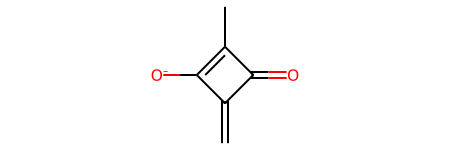

In [20]:
# Substructure example

input_smiles = "C1(C(=C)C([O-])=C1C)=O"

display(Markdown("### Substructure"))
display(
    Markdown(
        f"We will list molecules containing the Squarilium (`{input_smiles}`) substructure"
    )
)

smiles_mol = Chem.MolFromSmiles(input_smiles)
display(smiles_mol)

In [21]:
# Prepare and run query

compounds = query_chemistry(api, CompoundsBySubstructure(structure=input_smiles))

In [22]:
# Visualize results

results_table = [c.model_dump() for c in compounds]

df = pd.DataFrame(results_table)
display(df)
mols2grid.display(df, smiles_col="smiles")

,id,persistent_id,smiles,display_name,inchi,inchikey,sum_formula
0,12576452,4db9b046155dac95bae322edbcae498cd48859d8f4b650...,C=C1C(=O)C(C)=C1[O-],C=C1C(=O)C(C)=C1[O-],"InChI=1S/C6H6O2/c1-3-5(7)4(2)6(3)8/h7H,1H2,2H3...",ZEIYJLBLPXZNBA-UHFFFAOYSA-M,C6 O2 H5
1,6566647,31703e16640ffdbbae9b966895c80b4d784154192b52f6...,CC=C1C(=O)C(C)=C1[O-],CC=C1C(=O)C(C)=C1[O-],"InChI=1S/C7H8O2/c1-3-5-6(8)4(2)7(5)9/h3,8H,1-2...",MRRMJCCJXXFYQL-UHFFFAOYSA-M,C7 O2 H7
2,5246931,f2b8ea5e91929b22517d5137e8c041eb50e694698b8ff9...,B=CC1=C([O-])C(=CB)C1=O,B=CC1=C([O-])C(=CB)C1=O,InChI=1S/C6H6B2O2/c7-1-3-5(9)4(2-8)6(3)10/h1-2...,JVRQFUIBPXGEIT-UHFFFAOYSA-M,B2 C6 O2 H5
3,2465381,cd62e640388efbed067ee17f833410540f20c9c6c6aa85...,C=CC1=C([O-])C(=CC)C1=O,C=CC1=C([O-])C(=CC)C1=O,"InChI=1S/C8H8O2/c1-3-5-7(9)6(4-2)8(5)10/h3-4,9...",UNLISOYFWAFYCD-UHFFFAOYSA-M,C8 O2 H7
4,16412721,b60900cf3a3c8b3a08cfce55bdf3791a75813474baaa8b...,CC=C1C(=O)C(CC)=C1[O-],CC=C1C(=O)C(CC)=C1[O-],"InChI=1S/C8H10O2/c1-3-5-7(9)6(4-2)8(5)10/h3,9H...",JTJNWLAXYJHPOG-UHFFFAOYSA-M,C8 O2 H9
5,11987623,0a86bf8d6efb8a164e0209b92d65a5f9361e759afb897d...,C=C=CC1=C([O-])C(=CC)C1=O,C=C=CC1=C([O-])C(=CC)C1=O,InChI=1S/C9H8O2/c1-3-5-7-8(10)6(4-2)9(7)11/h4-...,GOHLBXBLOSYIOT-UHFFFAOYSA-M,C9 O2 H7
6,4736027,e2d940e3d3e60af1c94779a97dcc53ac67ba4926b3a5e9...,CC=CC1=C([O-])C(=CC)C1=O,CC=CC1=C([O-])C(=CC)C1=O,InChI=1S/C9H10O2/c1-3-5-7-8(10)6(4-2)9(7)11/h3...,NFQOMQHJWKYNKU-UHFFFAOYSA-M,C9 O2 H9
7,23018180,f08f2f7c34c153bb104e2922f4ec4a772b9a4d325fcf43...,CC1=C([O-])C(=C2C=CC(C)=[N+]2C)C1=O,CC1=C([O-])C(=C2C=CC(C)=[N+]2C)C1=O,InChI=1S/C11H11NO2/c1-6-4-5-8(12(6)3)9-10(13)7...,HWXXMXYZGUFSNO-UHFFFAOYSA-N,C11 N O2 H11
8,6439062,3f722996a0be6fb3482aed6ee82ca0abb250a66a386e63...,C=C(C)C=C1C(=O)C(C=C(C)C)=C1[O-],C=C(C)C=C1C(=O)C(C=C(C)C)=C1[O-],InChI=1S/C12H14O2/c1-7(2)5-9-11(13)10(12(9)14)...,JAABFKAJJUECJS-UHFFFAOYSA-M,C12 O2 H13
9,2968711,e4f215daa5f8fad9880ddcc109451ea586df17c4466499...,CN(C)C=C1C(=O)C(C=[N+](C)C)=C1[O-],CN(C)C=C1C(=O)C(C=[N+](C)C)=C1[O-],InChI=1S/C10H14N2O2/c1-11(2)5-7-9(13)8(10(7)14...,MDKPXRDQPQDBSK-UHFFFAOYSA-N,C10 N2 O2 H14


MolGridWidget()

### Similarity

We will list molecules similiar to Thiamethoxam (`CN1COCN(C1=N[N+](=O)[O-])CC2=CN=C(S2)Cl`)

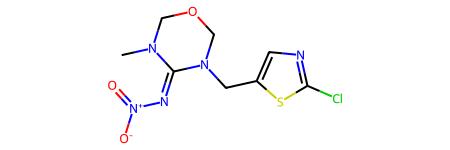

In [23]:
# Similarity example

input_smiles = "CN1COCN(C1=N[N+](=O)[O-])CC2=CN=C(S2)Cl"

display(Markdown("### Similarity"))
display(Markdown(f"We will list molecules similiar to Thiamethoxam (`{input_smiles}`)"))

smiles_mol = Chem.MolFromSmiles(input_smiles)
display(smiles_mol)

In [24]:
# Prepare and run query

resp = query_chemistry(api, CompoundsBySimilarity(structure=input_smiles))

In [25]:
# Visualize results

results_table = [c.model_dump() for c in compounds]

df = pd.DataFrame(results_table)
display(df)
mols2grid.display(df, smiles_col="smiles")

,id,persistent_id,smiles,display_name,inchi,inchikey,sum_formula
0,12576452,4db9b046155dac95bae322edbcae498cd48859d8f4b650...,C=C1C(=O)C(C)=C1[O-],C=C1C(=O)C(C)=C1[O-],"InChI=1S/C6H6O2/c1-3-5(7)4(2)6(3)8/h7H,1H2,2H3...",ZEIYJLBLPXZNBA-UHFFFAOYSA-M,C6 O2 H5
1,6566647,31703e16640ffdbbae9b966895c80b4d784154192b52f6...,CC=C1C(=O)C(C)=C1[O-],CC=C1C(=O)C(C)=C1[O-],"InChI=1S/C7H8O2/c1-3-5-6(8)4(2)7(5)9/h3,8H,1-2...",MRRMJCCJXXFYQL-UHFFFAOYSA-M,C7 O2 H7
2,5246931,f2b8ea5e91929b22517d5137e8c041eb50e694698b8ff9...,B=CC1=C([O-])C(=CB)C1=O,B=CC1=C([O-])C(=CB)C1=O,InChI=1S/C6H6B2O2/c7-1-3-5(9)4(2-8)6(3)10/h1-2...,JVRQFUIBPXGEIT-UHFFFAOYSA-M,B2 C6 O2 H5
3,2465381,cd62e640388efbed067ee17f833410540f20c9c6c6aa85...,C=CC1=C([O-])C(=CC)C1=O,C=CC1=C([O-])C(=CC)C1=O,"InChI=1S/C8H8O2/c1-3-5-7(9)6(4-2)8(5)10/h3-4,9...",UNLISOYFWAFYCD-UHFFFAOYSA-M,C8 O2 H7
4,16412721,b60900cf3a3c8b3a08cfce55bdf3791a75813474baaa8b...,CC=C1C(=O)C(CC)=C1[O-],CC=C1C(=O)C(CC)=C1[O-],"InChI=1S/C8H10O2/c1-3-5-7(9)6(4-2)8(5)10/h3,9H...",JTJNWLAXYJHPOG-UHFFFAOYSA-M,C8 O2 H9
5,11987623,0a86bf8d6efb8a164e0209b92d65a5f9361e759afb897d...,C=C=CC1=C([O-])C(=CC)C1=O,C=C=CC1=C([O-])C(=CC)C1=O,InChI=1S/C9H8O2/c1-3-5-7-8(10)6(4-2)9(7)11/h4-...,GOHLBXBLOSYIOT-UHFFFAOYSA-M,C9 O2 H7
6,4736027,e2d940e3d3e60af1c94779a97dcc53ac67ba4926b3a5e9...,CC=CC1=C([O-])C(=CC)C1=O,CC=CC1=C([O-])C(=CC)C1=O,InChI=1S/C9H10O2/c1-3-5-7-8(10)6(4-2)9(7)11/h3...,NFQOMQHJWKYNKU-UHFFFAOYSA-M,C9 O2 H9
7,23018180,f08f2f7c34c153bb104e2922f4ec4a772b9a4d325fcf43...,CC1=C([O-])C(=C2C=CC(C)=[N+]2C)C1=O,CC1=C([O-])C(=C2C=CC(C)=[N+]2C)C1=O,InChI=1S/C11H11NO2/c1-6-4-5-8(12(6)3)9-10(13)7...,HWXXMXYZGUFSNO-UHFFFAOYSA-N,C11 N O2 H11
8,6439062,3f722996a0be6fb3482aed6ee82ca0abb250a66a386e63...,C=C(C)C=C1C(=O)C(C=C(C)C)=C1[O-],C=C(C)C=C1C(=O)C(C=C(C)C)=C1[O-],InChI=1S/C12H14O2/c1-7(2)5-9-11(13)10(12(9)14)...,JAABFKAJJUECJS-UHFFFAOYSA-M,C12 O2 H13
9,2968711,e4f215daa5f8fad9880ddcc109451ea586df17c4466499...,CN(C)C=C1C(=O)C(C=[N+](C)C)=C1[O-],CN(C)C=C1C(=O)C(C=[N+](C)C)=C1[O-],InChI=1S/C10H14N2O2/c1-11(2)5-7-9(13)8(10(7)14...,MDKPXRDQPQDBSK-UHFFFAOYSA-N,C10 N2 O2 H14


MolGridWidget()

In [26]:
# SMARTS example

input_smarts = "[#6]-[#16X3](-[#6]"

display(Markdown("### SMARTS"))
display(Markdown(f"We will list compounds that are described by SMARTS `{input_smarts}`"))

### SMARTS

We will list compounds that are described by SMARTS `[#6]-[#16X3](-[#6]`

In [27]:
# Prepare and run query

resp = query_chemistry(api, CompoundsBySmarts(structure=input_smiles))

In [28]:
# Visualize results

results_table = [c.model_dump() for c in compounds]

df = pd.DataFrame(results_table)
display(df)
mols2grid.display(df, smiles_col="smiles")

,id,persistent_id,smiles,display_name,inchi,inchikey,sum_formula
0,12576452,4db9b046155dac95bae322edbcae498cd48859d8f4b650...,C=C1C(=O)C(C)=C1[O-],C=C1C(=O)C(C)=C1[O-],"InChI=1S/C6H6O2/c1-3-5(7)4(2)6(3)8/h7H,1H2,2H3...",ZEIYJLBLPXZNBA-UHFFFAOYSA-M,C6 O2 H5
1,6566647,31703e16640ffdbbae9b966895c80b4d784154192b52f6...,CC=C1C(=O)C(C)=C1[O-],CC=C1C(=O)C(C)=C1[O-],"InChI=1S/C7H8O2/c1-3-5-6(8)4(2)7(5)9/h3,8H,1-2...",MRRMJCCJXXFYQL-UHFFFAOYSA-M,C7 O2 H7
2,5246931,f2b8ea5e91929b22517d5137e8c041eb50e694698b8ff9...,B=CC1=C([O-])C(=CB)C1=O,B=CC1=C([O-])C(=CB)C1=O,InChI=1S/C6H6B2O2/c7-1-3-5(9)4(2-8)6(3)10/h1-2...,JVRQFUIBPXGEIT-UHFFFAOYSA-M,B2 C6 O2 H5
3,2465381,cd62e640388efbed067ee17f833410540f20c9c6c6aa85...,C=CC1=C([O-])C(=CC)C1=O,C=CC1=C([O-])C(=CC)C1=O,"InChI=1S/C8H8O2/c1-3-5-7(9)6(4-2)8(5)10/h3-4,9...",UNLISOYFWAFYCD-UHFFFAOYSA-M,C8 O2 H7
4,16412721,b60900cf3a3c8b3a08cfce55bdf3791a75813474baaa8b...,CC=C1C(=O)C(CC)=C1[O-],CC=C1C(=O)C(CC)=C1[O-],"InChI=1S/C8H10O2/c1-3-5-7(9)6(4-2)8(5)10/h3,9H...",JTJNWLAXYJHPOG-UHFFFAOYSA-M,C8 O2 H9
5,11987623,0a86bf8d6efb8a164e0209b92d65a5f9361e759afb897d...,C=C=CC1=C([O-])C(=CC)C1=O,C=C=CC1=C([O-])C(=CC)C1=O,InChI=1S/C9H8O2/c1-3-5-7-8(10)6(4-2)9(7)11/h4-...,GOHLBXBLOSYIOT-UHFFFAOYSA-M,C9 O2 H7
6,4736027,e2d940e3d3e60af1c94779a97dcc53ac67ba4926b3a5e9...,CC=CC1=C([O-])C(=CC)C1=O,CC=CC1=C([O-])C(=CC)C1=O,InChI=1S/C9H10O2/c1-3-5-7-8(10)6(4-2)9(7)11/h3...,NFQOMQHJWKYNKU-UHFFFAOYSA-M,C9 O2 H9
7,23018180,f08f2f7c34c153bb104e2922f4ec4a772b9a4d325fcf43...,CC1=C([O-])C(=C2C=CC(C)=[N+]2C)C1=O,CC1=C([O-])C(=C2C=CC(C)=[N+]2C)C1=O,InChI=1S/C11H11NO2/c1-6-4-5-8(12(6)3)9-10(13)7...,HWXXMXYZGUFSNO-UHFFFAOYSA-N,C11 N O2 H11
8,6439062,3f722996a0be6fb3482aed6ee82ca0abb250a66a386e63...,C=C(C)C=C1C(=O)C(C=C(C)C)=C1[O-],C=C(C)C=C1C(=O)C(C=C(C)C)=C1[O-],InChI=1S/C12H14O2/c1-7(2)5-9-11(13)10(12(9)14)...,JAABFKAJJUECJS-UHFFFAOYSA-M,C12 O2 H13
9,2968711,e4f215daa5f8fad9880ddcc109451ea586df17c4466499...,CN(C)C=C1C(=O)C(C=[N+](C)C)=C1[O-],CN(C)C=C1C(=O)C(C=[N+](C)C)=C1[O-],InChI=1S/C10H14N2O2/c1-11(2)5-7-9(13)8(10(7)14...,MDKPXRDQPQDBSK-UHFFFAOYSA-N,C10 N2 O2 H14


MolGridWidget()

---

## List molecules in patents

In this section we will use the `CompoundsIn` method which searches the Deep Search corpus for
listing all molecules contained in the input list of patents.


In [29]:
# Prepare and run query. Use wildcards '%' to include partial matches.

patent_ids = ["US10526338B%"]

compounds = query_chemistry(api, CompoundsIn(documents=DocumentsByIds(publication_ids=patent_ids)), limit=20)

# Visualize results
results_table = [c.model_dump() for c in compounds]

df = pd.DataFrame(results_table)
display(df)
mols2grid.display(df, smiles_col="smiles")

,id,persistent_id,smiles,display_name,inchi,inchikey,sum_formula
0,11812939,c710dad9b60760130e299f43a54abd9a781049d2bca379...,CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(...,CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(...,"InChI=1S/C24H20ClFN6O2/c1-24(2,18-5-3-4-6-28-1...",JUPUMSRQQQUOLP-UHFFFAOYSA-N,C24 N6 O2 F Cl H20
1,7764837,f973c62c68788cfb174527742fa7141486734fe434e663...,CCOC(=O)CC(N)C(C)(C)C1=NC=CC=C1,CCOC(=O)CC(N)C(C)(C)C1=NC=CC=C1,InChI=1S/C13H20N2O2/c1-4-17-12(16)9-10(14)13(2...,YSJJRYJLMJLXLU-UHFFFAOYSA-N,C13 N2 O2 H20
2,22798127,05254aa456aab76bfd4915eaae6e856ac60288d01d6037...,CCOC(=O)C=C(N)C(C)(C)C1=NC=CC=C1,CCOC(=O)C=C(N)C(C)(C)C1=NC=CC=C1,InChI=1S/C13H18N2O2/c1-4-17-12(16)9-10(14)13(2...,OPXOXVDSPZXHQT-UHFFFAOYSA-N,C13 N2 O2 H18
3,21664080,08743344ce06860ead6974eb4bcc45c21a9fb77bce9e2a...,CC(C)(C#N)C1=NC=CC=C1,CC(C)(C#N)C1=NC=CC=C1,"InChI=1S/C9H10N2/c1-9(2,7-10)8-5-3-4-6-11-8/h3...",SYILGDLWTPODQG-UHFFFAOYSA-N,C9 N2 H10
4,9165869,dbda28347183c8af83a20552086b4e83a8e1fc72ca8215...,CCOC(=O)CBr,CCOC(=O)CBr,"InChI=1S/C4H7BrO2/c1-2-7-4(6)3-5/h2-3H2,1H3",PQJJJMRNHATNKG-UHFFFAOYSA-N,C4 O2 Br H7
5,3996384,f26b4a13da380718f91b2262768396cbf34970623ecd9f...,FC1=C(Cl)N=C(Cl)N=C1,FC1=C(Cl)N=C(Cl)N=C1,InChI=1S/C4HCl2FN2/c5-3-2(7)1-8-4(6)9-3/h1H,WHPFEQUEHBULBW-UHFFFAOYSA-N,C4 N2 F Cl2 H
6,18015243,45590c377e3c588006efadd8328d47b9eb2e1219742597...,CCOC(=O)CC(NC1=C(F)C=NC(Cl)=N1)C(C)(C)C1=NC=CC=C1,CCOC(=O)CC(NC1=C(F)C=NC(Cl)=N1)C(C)(C)C1=NC=CC=C1,InChI=1S/C17H20ClFN4O2/c1-4-25-14(24)9-13(17(2...,CXRDUYYPPXCZQP-UHFFFAOYSA-N,C17 N4 O2 F Cl H20
7,10042590,2688505f1816fd8d728403a372070ef2b6317b717d32ab...,CC1=CC=C(S(=O)(=O)N2C=C(B3OC(C)(C)C(C)(C)O3)C3...,CC1=CC=C(S(=O)(=O)N2C=C(B3OC(C)(C)C(C)(C)O3)C3...,InChI=1S/C19H22BN3O4S/c1-13-6-8-14(9-7-13)28(2...,ZYPOBLQBYBAHND-UHFFFAOYSA-N,B C19 N3 O4 S H22
8,12896121,343d3af8936adcac22b74c5f8a5550b53da115d56e49d5...,CCOC(=O)CC(NC1=NC(C2=CN(S(=O)(=O)C3=CC=C(C)C=C...,CCOC(=O)CC(NC1=NC(C2=CN(S(=O)(=O)C3=CC=C(C)C=C...,InChI=1S/C30H30FN7O4S/c1-5-42-26(39)14-25(30(3...,ATBXPYKLIPAOJP-UHFFFAOYSA-N,C30 N7 O4 F S H30
9,16211747,76a5a6af83a4e902a4db1534d6fa8914b4d971e402482b...,CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=NC(C2=CNC3=C2C...,CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=NC(C2=CNC3=C2C...,"InChI=1S/C21H20FN7O2/c1-21(2,15-5-3-4-6-24-15)...",DJGLZZCDMMVHRE-UHFFFAOYSA-N,C21 N7 O2 F H20


MolGridWidget()

### Location of molecules in patent

The PatCID data also allows us to retrieve the location of the molecules in the patent, for example on which page they are mentioned.

In the next blocks we will
- Fetch the original document
- Lookup the location of the molecules
- Output the page information as well as the direct UI link to the document
- Visualize the document page highlighting the matched figure


In [30]:
patent_id = "US10526338B2"

# Load the full document
patent_smiles_coords = ElasticDataCollectionSource(
    elastic_id="default", index_key="patent-smiles"
)
query = DataQuery(
    f'identifiers.value:"{patent_id}"',
    coordinates=patent_smiles_coords,
)

doc_resp = api.queries.run(query)

# Build the lookup of entities
document = doc_resp.outputs["data_outputs"][0]["_source"]
lookup = EntitiesLookup(document)

molecules_location_table = []
for _, row in df.iterrows():
    matches = lookup.get(entity_type="smiles", entity=row["smiles"])
    for match in matches:
        doc_url = api.documents.generate_url(
            document_hash=document["file-info"]["document-hash"],
            data_source=patent_smiles_coords,
            item_index=match.index,
        )
        match_page = match.content["prov"][0]["page"]
        molecules_location_table.append(
            {
                "SMILES": row["smiles"],
                "Patent": patent_id,
                "Page": match_page,
                "Url": f"<a href='{doc_url}' rel='noopener noreferrer' target='_blank'>View online</a>",
                "Doc": document,
                "Fig": match.content,
            }
        )
molecules_location_table.sort(key=lambda row: (row["Patent"], row["Page"]))
df_molecules_location = pd.DataFrame(
    molecules_location_table, columns=["SMILES", "Patent", "Page", "Url"]
)
display(HTML(df_molecules_location.to_html(escape=False)))

,SMILES,Patent,Page,Url
0,CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1,US10526338B2,3,<a href='https://pr-463-cps-dev.deepsearch-dev.zurich.ibm.com/projects/1234567890abcdefghijklmnopqrstvwyz123456/library/public?search=JTdCJTIyY29sbGVjdGlvbnMlMjIlM0ElNUIlMjJwYXRlbnQtc21pbGVzJTIyJTVEJTJDJTIydHlwZSUyMiUzQSUyMkRvY3VtZW50JTIyJTJDJTIyZXhwcmVzc2lvbiUyMiUzQSUyMmZpbGUtaW5mby5kb2N1bWVudC1oYXNoJTNBJTIwJTVDJTIyMTQ2NDJiMDc3MzkxOGE2MTAwYzVkNWJhOTZmYWRjNzMxYTQzMjBiNmNiYTJjNzlkNGMzMDUzOTJjODM1ODdkZSU1QyUyMiUyMiUyQyUyMmZpbHRlcnMlMjIlM0ElNUIlNUQlMkMlMjJzZWxlY3QlMjIlM0ElNUIlMjJfbmFtZSUyMiUyQyUyMmRlc2NyaXB0aW9uLmNvbGxlY3Rpb24lMjIlMkMlMjJwcm92JTIyJTJDJTIyZGVzY3JpcHRpb24udGl0bGUlMjIlMkMlMjJkZXNjcmlwdGlvbi5wdWJsaWNhdGlvbl9kYXRlJTIyJTJDJTIyZGVzY3JpcHRpb24udXJsX3JlZnMlMjIlNUQlMkMlMjJpdGVtSW5kZXglMjIlM0EwJTJDJTIycGFnZVNpemUlMjIlM0ExMCUyQyUyMnNlYXJjaEFmdGVySGlzdG9yeSUyMiUzQSU1QiU1RCUyQyUyMnZpZXdUeXBlJTIyJTNBJTIyc25pcHBldHMlMjIlMkMlMjJyZWNvcmRTZWxlY3Rpb24lMjIlM0ElN0IlMjJyZWNvcmQlMjIlM0ElN0IlMjJpZCUyMiUzQSUyMjE0NjQyYjA3NzM5MThhNjEwMGM1ZDViYTk2ZmFkYzczMWE0MzIwYjZjYmEyYzc5ZDRjMzA1MzkyYzgzNTg3ZGUlMjIlN0QlMkMlMjJpdGVtSW5kZXglMjIlM0ExJTdEJTdE' rel='noopener noreferrer' target='_blank'>View online
1,CCOC(=O)CC(N)C(C)(C)C1=NC=CC=C1,US10526338B2,5,<a href='https://pr-463-cps-dev.deepsearch-dev.zurich.ibm.com/projects/1234567890abcdefghijklmnopqrstvwyz123456/library/public?search=JTdCJTIyY29sbGVjdGlvbnMlMjIlM0ElNUIlMjJwYXRlbnQtc21pbGVzJTIyJTVEJTJDJTIydHlwZSUyMiUzQSUyMkRvY3VtZW50JTIyJTJDJTIyZXhwcmVzc2lvbiUyMiUzQSUyMmZpbGUtaW5mby5kb2N1bWVudC1oYXNoJTNBJTIwJTVDJTIyMTQ2NDJiMDc3MzkxOGE2MTAwYzVkNWJhOTZmYWRjNzMxYTQzMjBiNmNiYTJjNzlkNGMzMDUzOTJjODM1ODdkZSU1QyUyMiUyMiUyQyUyMmZpbHRlcnMlMjIlM0ElNUIlNUQlMkMlMjJzZWxlY3QlMjIlM0ElNUIlMjJfbmFtZSUyMiUyQyUyMmRlc2NyaXB0aW9uLmNvbGxlY3Rpb24lMjIlMkMlMjJwcm92JTIyJTJDJTIyZGVzY3JpcHRpb24udGl0bGUlMjIlMkMlMjJkZXNjcmlwdGlvbi5wdWJsaWNhdGlvbl9kYXRlJTIyJTJDJTIyZGVzY3JpcHRpb24udXJsX3JlZnMlMjIlNUQlMkMlMjJpdGVtSW5kZXglMjIlM0EwJTJDJTIycGFnZVNpemUlMjIlM0ExMCUyQyUyMnNlYXJjaEFmdGVySGlzdG9yeSUyMiUzQSU1QiU1RCUyQyUyMnZpZXdUeXBlJTIyJTNBJTIyc25pcHBldHMlMjIlMkMlMjJyZWNvcmRTZWxlY3Rpb24lMjIlM0ElN0IlMjJyZWNvcmQlMjIlM0ElN0IlMjJpZCUyMiUzQSUyMjE0NjQyYjA3NzM5MThhNjEwMGM1ZDViYTk2ZmFkYzczMWE0MzIwYjZjYmEyYzc5ZDRjMzA1MzkyYzgzNTg3ZGUlMjIlN0QlMkMlMjJpdGVtSW5kZXglMjIlM0E1JTdEJTdE' rel='noopener noreferrer' target='_blank'>View online
2,CCOC(=O)C=C(N)C(C)(C)C1=NC=CC=C1,US10526338B2,5,<a href='https://pr-463-cps-dev.deepsearch-dev.zurich.ibm.com/projects/1234567890abcdefghijklmnopqrstvwyz123456/library/public?search=JTdCJTIyY29sbGVjdGlvbnMlMjIlM0ElNUIlMjJwYXRlbnQtc21pbGVzJTIyJTVEJTJDJTIydHlwZSUyMiUzQSUyMkRvY3VtZW50JTIyJTJDJTIyZXhwcmVzc2lvbiUyMiUzQSUyMmZpbGUtaW5mby5kb2N1bWVudC1oYXNoJTNBJTIwJTVDJTIyMTQ2NDJiMDc3MzkxOGE2MTAwYzVkNWJhOTZmYWRjNzMxYTQzMjBiNmNiYTJjNzlkNGMzMDUzOTJjODM1ODdkZSU1QyUyMiUyMiUyQyUyMmZpbHRlcnMlMjIlM0ElNUIlNUQlMkMlMjJzZWxlY3QlMjIlM0ElNUIlMjJfbmFtZSUyMiUyQyUyMmRlc2NyaXB0aW9uLmNvbGxlY3Rpb24lMjIlMkMlMjJwcm92JTIyJTJDJTIyZGVzY3JpcHRpb24udGl0bGUlMjIlMkMlMjJkZXNjcmlwdGlvbi5wdWJsaWNhdGlvbl9kYXRlJTIyJTJDJTIyZGVzY3JpcHRpb24udXJsX3JlZnMlMjIlNUQlMkMlMjJpdGVtSW5kZXglMjIlM0EwJTJDJTIycGFnZVNpemUlMjIlM0ExMCUyQyUyMnNlYXJjaEFmdGVySGlzdG9yeSUyMiUzQSU1QiU1RCUyQyUyMnZpZXdUeXBlJTIyJTNBJTIyc25pcHBldHMlMjIlMkMlMjJyZWNvcmRTZWxlY3Rpb24lMjIlM0ElN0IlMjJyZWNvcmQlMjIlM0ElN0IlMjJpZCUyMiUzQSUyMjE0NjQyYjA3NzM5MThhNjEwMGM1ZDViYTk2ZmFkYzczMWE0MzIwYjZjYmEyYzc5ZDRjMzA1MzkyYzgzNTg3ZGUlMjIlN0QlMkMlMjJpdGVtSW5kZXglMjIlM0E2JTdEJTdE' rel='noopener noreferrer' target='_blank'>View online
3,CC(C)(C#N)C1=NC=CC=C1,US10526338B2,5,<a href='https://pr-463-cps-dev.deepsearch-dev.zurich.ibm.com/projects/1234567890abcdefghijklmnopqrstvwyz123456/library/public?search=JTdCJTIyY29sbGVjdGlvbnMlMjIlM0ElNUIlMjJwYXRlbnQtc21pbGVzJTIyJTVEJTJDJTIydHlwZSUyMiUzQSUyMkRvY3VtZW50JTIyJTJDJTIyZXhwcmVzc2lvbiUyMiUzQSUyMmZpbGUtaW5mby5kb2N1bWVudC1oYXNoJTNBJTIwJTVDJTIyMTQ2NDJiMDc3MzkxOGE2MTAwYzVkNWJhOTZmYWRjNzMxYTQzMjBiNmNiYTJjNzlkNGMzMDUzOTJjODM1ODdkZSU1QyUyMiUyMiUyQyUyMmZpbHRlcnMlMjIlM0ElNUIlNUQlMkMlM

Alternatively, we can inspect directly the matched molecules highlighted on the patent pages.

In [31]:
# Visualize table of pages

html_pages = ""
for row in sorted(molecules_location_table, key=lambda row: row["Page"]):
    page_svg = get_page_svg_with_item(row["Doc"], row["Fig"])
    html_pages += f"""
    <div class="matchpage">
        {page_svg}
        <p>
            Page {row["Page"]}
            <br />
            {row["SMILES"]}
        </p>
    </div>
    """

html_output = f"""
<style>
    .matchcontainer{{
        display: grid;
        grid-template-columns: 1fr 1fr 1fr;
    }}
    .matchpage{{
        width: 100%;
    }}

</style>
<div class="matchcontainer">
{html_pages}
</div>
"""

display(HTML(html_output))

---

## List patents with molecules

In this section we will use the `DocumentsHaving` method to retrieve documents that contain certain molecules.


In [32]:
# Prepare and run query.

input_smiles = "C1(C(=C)C([O-])=C1C)=O"

compounds = query_chemistry(api, DocumentsHaving(compounds=CompoundsBySubstructure(structure=input_smiles)), limit=20)

# Visualize results
results_table = [c.model_dump() for c in compounds]

df = pd.DataFrame(results_table)
display(df)

,id,persistent_id,application_id,publication_id,title
0,4060887,6801d280a90bd9abdd4f1752581ddfd2a2dd6ef95aec0c...,US9512423,USRE38251E1,USRE038251
1,4317855,ffc78cbee72d476bc5dddffbbd9a6a2503b4983fc600cd...,US15454794,US9932643B2,US9932643
2,4315650,5f7b359f2663feac1eca3d88d5f9334f48df4f1f83afed...,US15295332,US9921472B2,US9921472
3,4092378,ca1a06b505142cd91b274a488bce2f247549fff5db82f4...,US15623699,US9920087B2,US9920087
4,4325302,1e1b49e554f8e994cc4efa53d74de6d339621097c5442a...,US13459837,US9920020B2,US9920020
5,3650415,adf2c0218940898db506eb10d690c657585b5511731286...,US14773148,US9903797B2,US9903797
6,4322551,6324c8c82ebf9c974feb12a6fc555a1bce9db13a9958e4...,US15677538,US9879034B2,US9879034
7,3665963,ba540db80f763ae237a25e40cb6b158e21a52911f60bc7...,US15202202,US9864294B2,US9864294
8,3654661,6fd51d4a11cca1f4bef652029822e26c8abdf563e008f0...,US14353661,US9805879B2,US9805879
9,3435641,7582e77a40df186692af90ab56425d46d1369da316ffd8...,US14733764,US9791450B2,US9791450
